In [8]:
import pandas as pd
import numpy as np

In [9]:
data = pd.read_csv('examdata.csv')
# data.head()
print(data)

        Exam1      Exam2  Pass
0   34.623660  78.024693     0
1   30.286711  43.894998     0
2   35.847409  72.902198     0
3   60.182599  86.308552     1
4   79.032736  75.344376     1
..        ...        ...   ...
95  83.489163  48.380286     1
96  42.261701  87.103851     1
97  99.315009  68.775409     1
98  55.340018  64.931938     1
99  74.775893  89.529813     1

[100 rows x 3 columns]


In [10]:
data.loc[:,'Exam1']

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

In [11]:
data.loc[1:5,['Exam1','Pass']]

,Exam1,Pass
1,30.286711,0
2,35.847409,0
3,60.182599,1
4,79.032736,1
5,45.083277,0


In [12]:
data.loc[:,'Exam1']

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64

In [13]:
mask = data.loc[:,'Pass'] == 1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


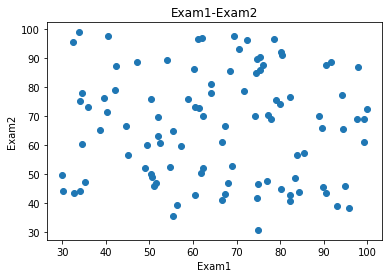

In [14]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
# plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()

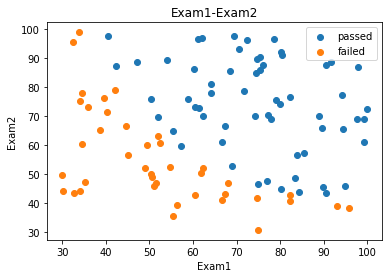

In [15]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])

# plt.scatter(data.loc[:,'Exam1'][],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [16]:
X = data.drop(['Pass'],axis = 1)
y = data.loc[:,'Pass']
x1  = data.loc[:,'Exam1']
x2  = data.loc[:,'Exam2']
x1.head()

0    34.623660
1    30.286711
2    35.847409
3    60.182599
4    79.032736
Name: Exam1, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X,y)

LogisticRegression()

In [18]:
y_predict = LR.predict(X)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.89


In [20]:
y_test = LR.predict([[70,65]])
print(y_test)

[1]


/Users/chinazhouwy/opt/anaconda3/envs/learn_ai/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [21]:
print(LR.intercept_,LR.coef_)

[-25.05219314] [[0.20535491 0.2005838 ]]


In [22]:
print(LR.coef_[0][0],LR.coef_[0][1])

0.20535491217790391 0.20058380395469058


##  LR.intercept_+LR.coef_[0][0]*x1 + LR.coef_[0][1]*x2 = 0

In [23]:
x2_new = -(LR.intercept_+LR.coef_[0][0]*x1)/LR.coef_[0][1]
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


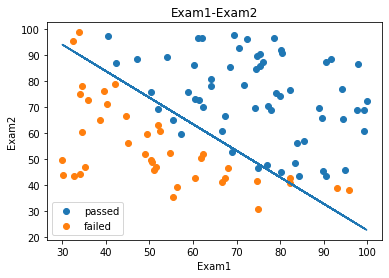

In [24]:
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'Exam1'][mask],data.loc[:,'Exam2'][mask])
failed = plt.scatter(data.loc[:,'Exam1'][~mask],data.loc[:,'Exam2'][~mask])
plt.plot(x1,x2_new)
# plt.scatter(data.loc[:,'Exam1'],data.loc[:,'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

# 

## 芯片（二阶线性回归）

In [25]:
import pandas as pd
import numpy as np

data = pd.read_csv('chip_test.csv')
# data.head()
print(data)

        test1     test2  pass
0    0.051267  0.699560     1
1   -0.092742  0.684940     1
2   -0.213710  0.692250     1
3   -0.375000  0.502190     1
4    0.183760  0.933480     0
..        ...       ...   ...
113 -0.720620  0.538740     0
114 -0.593890  0.494880     0
115 -0.484450  0.999270     0
116 -0.006336  0.999270     0
117  0.632650 -0.030612     0

[118 rows x 3 columns]


In [26]:
mask = data.loc[:,'pass'] == 1

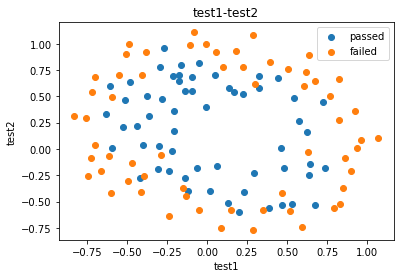

In [27]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])

# plt.scatter(data.loc[:,'Exam1'][],data.loc[:,'Exam2'])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [30]:
X = data.drop(['pass'],axis = 1)
y = data.loc[:,'pass']
X1  = data.loc[:,'test1']
X2  = data.loc[:,'test2']
X1.head()

0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4    0.183760
Name: test1, dtype: float64

##  $\theta_0 + \theta_1x_1 + \theta_2x_2 + \theta_3x_1^2 + \theta_4x_2^2 + \theta_5x_1x_2 = 0$

In [31]:
X1_2 = X1 * X1
X2_2 = X2 * X2
X1_X2 = X1 * X2
X_new = {'X1':X1,'X2':X2,'X1_2':X1_2,'X2_2':X2_2,'X1_X2':X1_X2}
X_new = pd.DataFrame(X_new)
print(X_new)

           X1        X2      X1_2      X2_2     X1_X2
0    0.051267  0.699560  0.002628  0.489384  0.035864
1   -0.092742  0.684940  0.008601  0.469143 -0.063523
2   -0.213710  0.692250  0.045672  0.479210 -0.147941
3   -0.375000  0.502190  0.140625  0.252195 -0.188321
4    0.183760  0.933480  0.033768  0.871385  0.171536
..        ...       ...       ...       ...       ...
113 -0.720620  0.538740  0.519293  0.290241 -0.388227
114 -0.593890  0.494880  0.352705  0.244906 -0.293904
115 -0.484450  0.999270  0.234692  0.998541 -0.484096
116 -0.006336  0.999270  0.000040  0.998541 -0.006332
117  0.632650 -0.030612  0.400246  0.000937 -0.019367

[118 rows x 5 columns]


In [36]:
from sklearn.linear_model import LogisticRegression
LR2 = LogisticRegression()
LR2.fit(X_new,y)


LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score
y2_predict = LR2.predict(X_new)
print(y2_predict)
accuracy_2 = accuracy_score(y,y2_predict)
print(accuracy_2)

[1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 1 0 0 1]
0.8135593220338984


In [40]:
X1_new = X1.sort_values()
theta0 = LR2.intercept_
theta1,theta2,theta3,theta4,theta5 = LR2.coef_[0][0], LR2.coef_[0][1],LR2.coef_[0][2],LR2.coef_[0][3],LR2.coef_[0][4]
a = theta4
b = theta5 * X1_new + theta2
c = theta0 + theta1 * X1_new + theta3 * X1_new * X1_new

def f(x):
    a = theta4
    b = theta5 * x + theta2
    c = theta0 + theta1 * x + theta3 * x * x
    x2_new_bound_1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
    x2_new_bound_2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)
    return x2_new_bound_1,x2_new_bound_2

x2_new_bound1 = []
x2_new_bound2 = []
for x in X1_new:
    x2_new_bound1.append(f(x)[0])
    x2_new_bound2.append(f(x)[1])
print(x2_new_bound1,x2_new_bound2)

[array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([nan]), array([0.1212617]), array([0.04679448]), array([0.02697935]), array([0.00872189]), array([-0.00830576]), array([-0.00830576]), array([-0.11718731]), array([-0.16040224]), array([-0.18016521]), array([-0.18965258]), array([-0.21671004]), array([-0.22530078]), array([-0.23369452]), array([-0.2499261]), array([-0.28761583]), array([-0.30846849]), array([-0.32171919]), array([-0.32816104]), array([-0.33448523]), array([-0.34069505]), array([-0.35278365]), array([-0.35866807]), array([-0.37013014]), array([-0.42186137]), array([-0.42656594]), array([-0.43119936]), array([-0.43574686]), array([-0.44021779]), array([-0.45318277]), array([-0.47336128]), array([-0.47336128]), array([-0.48465118]), array([-0.48828317]), array([-0.49185073]), array([-0.49185073]), array([-0.51193977]), array([-0.51193977]), array([-0.5181489]), array([-0.52412149]), array([-0.52986615]), array([-0.5298

/var/folders/84/g8qpsvld3294n39vyj75r6qm0000gn/T/ipykernel_97920/3044381815.py:12: RuntimeWarning: invalid value encountered in sqrt
  x2_new_bound_1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
/var/folders/84/g8qpsvld3294n39vyj75r6qm0000gn/T/ipykernel_97920/3044381815.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2_new_bound_2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)


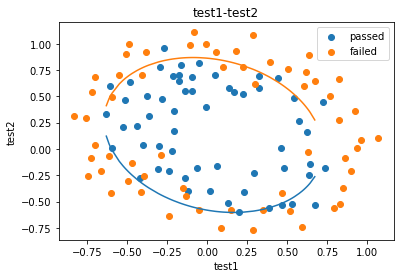

In [41]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(X1_new,x2_new_bound1)
plt.plot(X1_new,x2_new_bound2)
# plt.scatter(data.loc[:,'Exam1'][],data.loc[:,'Exam2'])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()

In [48]:
x1_range = [-0.9 + x/10000 for x in range(0,190000)]
x1_range = np.array(x1_range)

x2_new_bound1 = []
x2_new_bound2 = []
for x in x1_range:
    x2_new_bound1.append(f(x)[0])
    x2_new_bound2.append(f(x)[1])
# print(x2_new_bound1,x2_new_bound2)

/var/folders/84/g8qpsvld3294n39vyj75r6qm0000gn/T/ipykernel_97920/3044381815.py:12: RuntimeWarning: invalid value encountered in sqrt
  x2_new_bound_1 = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
/var/folders/84/g8qpsvld3294n39vyj75r6qm0000gn/T/ipykernel_97920/3044381815.py:13: RuntimeWarning: invalid value encountered in sqrt
  x2_new_bound_2 = (-b - np.sqrt(b*b - 4*a*c))/(2*a)


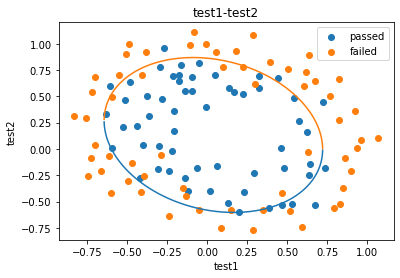

In [50]:
# %matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
passed = plt.scatter(data.loc[:,'test1'][mask],data.loc[:,'test2'][mask])
failed = plt.scatter(data.loc[:,'test1'][~mask],data.loc[:,'test2'][~mask])
plt.plot(x1_range,x2_new_bound1)
plt.plot(x1_range,x2_new_bound2)
# plt.scatter(data.loc[:,'Exam1'][],data.loc[:,'Exam2'])
plt.title('test1-test2')
plt.xlabel('test1')
plt.ylabel('test2')
plt.legend((passed,failed),('passed','failed'))
plt.show()